In [2]:
from jax import vmap, random
import jax.numpy as jnp
import matplotlib.pyplot as plt
import scipy as scp
import time

In [3]:
key = random.key(101)

c:\Users\Owner\Desktop\GaussianProcesses\venv\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Owner\Desktop\GaussianProcesses\venv\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


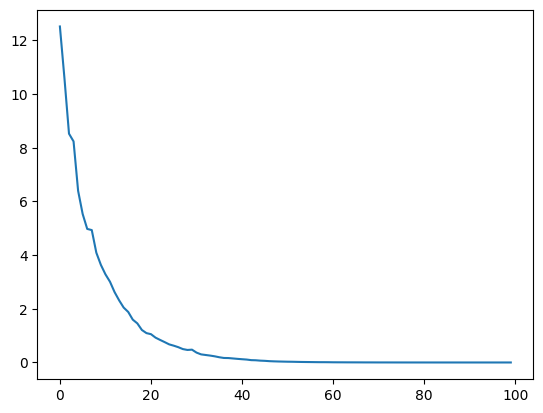

In [4]:
def kernel(gamma):
    def rbf(x, y):
        return jnp.exp(-gamma*jnp.sum((x-y)**2))
    return rbf

k = kernel(1)

vec_k = vmap(vmap(k, in_axes=(None ,0)), in_axes=(0, None))

N, M = 100,100
S = 10

X1 = 5*random.uniform(key, shape=(N, 2))
X2 = 5*random.uniform(key, shape=(M, 2))

K = vec_k(X1, X1) 

K_SX = K[:S, :]

K_SS = K[:S, :S]

NysK = K_SX.T @ jnp.linalg.inv(K_SS) @ K_SX


plt.plot(jnp.linalg.eigvals(K))

In [5]:
lambda_ = 0.01

C = NysK + lambda_*jnp.eye(N)

iCWoodbury = (1/lambda_)*jnp.eye(N) - (1/lambda_)*K_SX.T @ jnp.linalg.inv(K_SS + (1/lambda_)* K_SX @ K_SX.T) @ K_SX * (1/lambda_)

iC = jnp.linalg.inv(C)

print(f"General condition number: {jnp.linalg.cond(C)}")
print(f"KSS condition number: {jnp.linalg.cond(K_SS)}")
print(jnp.linalg.norm(iC @ C - jnp.eye(N)))
print(jnp.linalg.norm(iCWoodbury @ C - jnp.eye(N)))

General condition number: 1019.3561401367188
KSS condition number: 28.40518569946289
0.0004381706
0.0022672855


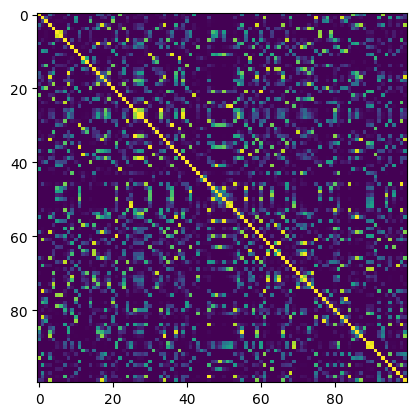

In [6]:
plt.imshow(K)

In [11]:
times = []
Nystrom_times = []
lambda_ = 0.01
for i in [500, 650]:
    print(i)
    for j in range(40):
        print(j)
        X = random.normal(key, (i,i))
        K = vec_k(X, X)
        s = i//2
        C = K + lambda_*jnp.eye(i)
        start = time.time()
        iC = jnp.linalg.inv(C)
        end = time.time()
        times.append(end - start)
        # K_SS = K[:s, :s]
        # K_SX = K[:s, :]
        # start = time.time()
        # iCWoodbury = (1/lambda_)*jnp.eye(i) - (1/lambda_)*K_SX.T @ jnp.linalg.inv(K_SS + (1/lambda_)* K_SX @ K_SX.T) @ K_SX * (1/lambda_)
        # end = time.time()
        # Nystrom_times.append(end - start)

500
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
650
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


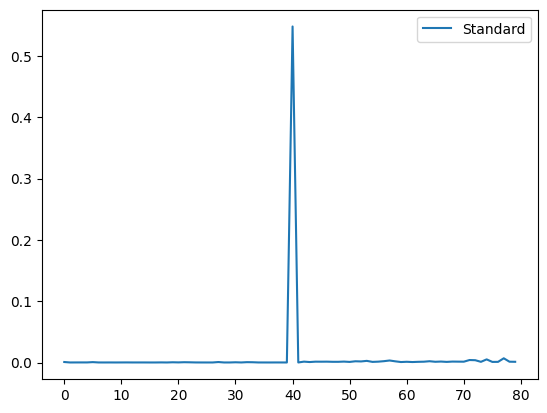

In [14]:
plt.figure(1)
plt.plot(jnp.arange(80), times, label="Standard")
plt.legend()

In [ ]:
B = random.normal((1000,1000))